# Individual Planning Report

In [1]:
library(tidyverse)
library(glue)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.2     ✔ tibble    3.3.0
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.1.0     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


## 1. Players Dataset Description

### Code

In [2]:
players <- read_csv('https://raw.githubusercontent.com/evanvoorbergen/dsci100-project/refs/heads/main/data/players.csv') |>
    rename(age = Age) |>
    rename(hashed_email = hashedEmail)

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [3]:
head(players)

experience,subscribe,hashed_email,played_hours,name,gender,age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17


In [4]:
players_summary <- summary(players)
players_summary

  experience        subscribe       hashed_email        played_hours    
 Length:196         Mode :logical   Length:196         Min.   :  0.000  
 Class :character   FALSE:52        Class :character   1st Qu.:  0.000  
 Mode  :character   TRUE :144       Mode  :character   Median :  0.100  
                                                       Mean   :  5.846  
                                                       3rd Qu.:  0.600  
                                                       Max.   :223.100  
                                                                        
     name              gender               age       
 Length:196         Length:196         Min.   : 9.00  
 Class :character   Class :character   1st Qu.:17.00  
 Mode  :character   Mode  :character   Median :19.00  
                                       Mean   :21.14  
                                       3rd Qu.:22.75  
                                       Max.   :58.00  
                               

In [5]:
dim(players)

sum(is.na(players))

[1] 196   7

[1] 2

In [6]:
# Experience
experience_count <- players |>
    group_by(experience) |>
    summarize(count = n())
experience_count

experience_most <- experience_count |>
    slice_max(count) |>
    pull(experience)
print(glue('The experience level with most players: {experience_most}'))

experience_least <- experience_count |>
    slice_min(count) |>
    pull(experience)
print(glue('The experience level with least players: {experience_least}'))

experience,count
<chr>,<int>
Amateur,63
Beginner,35
Pro,14
Regular,36
Veteran,48


The experience level with most players: Amateur
The experience level with least players: Pro


In [7]:
# Subscribers
subscribe_numbers <- players |>
    group_by(subscribe) |>
    summarize(count = n()) |>
    mutate(total_players = sum(count)) |>
    mutate(proportion_sub = round(count / total_players, 2)) |>
    select(-total_players)
subscribe_numbers

subscribe,count,proportion_sub
<lgl>,<int>,<dbl>
FALSE,52,0.27
TRUE,144,0.73


In [8]:
# Hours Played
hour_count <- players |>
    group_by(played_hours) |>
    summarize(count = n())
# hour_count

hour_most <- hour_count |>
    max()
print(glue('The most hours played: {hour_most}'))

hour_least <- hour_count |>
    min()
print(glue('The least hours played: {hour_least}'))

hour_mean <- players |>
    summarize(mean_hours = mean(played_hours)) |>
    pull() |>
    round(2)
print(glue('The average hours played: {hour_mean}'))

The most hours played: 223.1
The least hours played: 0
The average hours played: 5.85


In [9]:
# Gender
gender_count <- players |>
    group_by(gender) |>
    summarize(count = n())
gender_count

gender_most <- gender_count |>
    slice_max(count) |>
    pull(gender)
print(glue('The gender that plays most: {gender_most}'))

gender_least <- gender_count |>
    slice_min(count) |>
    pull(gender)
print(glue('The gender that plays least: {gender_least}'))

gender,count
<chr>,<int>
Agender,2
Female,37
Male,124
Non-binary,15
Other,1
Prefer not to say,11
Two-Spirited,6


The gender that plays most: Male
The gender that plays least: Other


In [10]:
# Name
name_count <- players |>
    group_by(name) |>
    summarize(count = n()) |>
    arrange()
# name_count


#all names are only used once

In [11]:
# age
age_count <- players |>
    group_by(age) |>
    summarize(count = n())
# age_count

age_most <- age_count |>
    slice_max(age) |>
    pull(age)
print(glue('The oldest player is: {age_most}'))

age_least <- age_count |>
    slice_min(age) |>
    pull(age)
print(glue('The youngest player is: {age_least}'))

age_mean <- players |>
    summarize(mean_age = mean(age, na.rm = TRUE)) |>
    pull() |>
    round(2)
print(glue('The mean age is: {age_mean}'))

age_mode <- age_count |>
    slice_max(count) |>
    pull(age)
print(glue('The most common age is: {age_mode}'))

na_number <- players |>
    summarize(num_NA = sum(is.na(age))) |>
    pull()
print(glue('{na_number} people have not provided their age'))

#must remove NA ages!

The oldest player is: 58
The youngest player is: 9
The mean age is: 21.14
The most common age is: 17
2 people have not provided their age


In [12]:
sessions <- read_csv('https://raw.githubusercontent.com/evanvoorbergen/dsci100-project/refs/heads/main/data/sessions.csv') |>
    rename(hashed_email = hashedEmail) |>
    separate(start_time, c("start_date", "start_time"), " ") |>
    separate(end_time, c("end_date", "end_time"), " ")
    

Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [13]:
head(sessions)

hashed_email,start_date,start_time,end_date,end_time,original_start_time,original_end_time
<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,30/06/2024,18:12,30/06/2024,18:24,1.71977e+12,1.71977e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,17/06/2024,23:33,17/06/2024,23:46,1.71867e+12,1.71867e+12
f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,25/07/2024,17:34,25/07/2024,17:57,1.72193e+12,1.72193e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,25/07/2024,03:22,25/07/2024,03:58,1.72188e+12,1.72188e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,25/05/2024,16:01,25/05/2024,16:12,1.71665e+12,1.71665e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,23/06/2024,15:08,23/06/2024,17:10,1.71916e+12,1.71916e+12


In [14]:
dim(sessions)

[1] 1535    7

In [15]:
sessions_summary <- summary(sessions)
sessions_summary

 hashed_email        start_date         start_time          end_date        
 Length:1535        Length:1535        Length:1535        Length:1535       
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
                                                                            
                                                                            
                                                                            
                                                                            
   end_time         original_start_time original_end_time  
 Length:1535        Min.   :1.712e+12   Min.   :1.712e+12  
 Class :character   1st Qu.:1.716e+12   1st Qu.:1.716e+12  
 Mode  :character   Median :1.719e+12   Median :1.719e+12  
                    Mean   :1.719e+12   Mean   :1.719e+12  
                    3rd Qu.:1.722e+12   3rd Qu.:1.722e+12  
                    Max.

In [16]:
#hashed Email
email_count <- sessions |>
    group_by(hashed_email) |>
    summarize(count = n())
# email_count

max_sessions <- email_count |>
    slice_max(count) |>
    pull(count)
print(glue('The maximum number of sessions for a player is: {max_sessions}'))

min_sessions <- email_count |>
    arrange(count) |>
    slice(1) |>
    pull(count)
print(glue('The minimum number of sessions for a player is: {min_sessions}'))

mean_sessions <- email_count |>
    summarize(mean = mean(count)) |>
    pull()
print(glue('The mean number of sessions for a player is: {mean_sessions}'))

The maximum number of sessions for a player is: 310
The minimum number of sessions for a player is: 1
The mean number of sessions for a player is: 12.28


In [17]:
#start_date
startdate_count <- sessions |>
    group_by(start_date) |>
    summarize(count = n())
# start_date

max_starters <- startdate_count |>
    slice_max(count) |>
    pull(start_date)
print(glue('The most common start date is: {max_starters}'))


The most common start date is: 25/07/2024


In [18]:
#end_date
enddate_count <- sessions |>
    group_by(end_date) |>
    summarize(count = n())


max_enders <- enddate_count |>
    slice_max(count) |>
    pull(end_date)
print(glue('The most common end date is: {max_enders}'))

The most common end date is: 25/07/2024


In [19]:
#start time
starttime_count <- sessions |>
    group_by(start_time) |>
    summarize(count = n())
# start_time

max_startertime <- starttime_count |>
    slice_max(count) |>
    pull(start_time)
print(glue('The most common start time: {max_startertime}'))

The most common start time: 02:29
The most common start time: 02:31


In [20]:
#end time
endtime_count <- sessions |>
    group_by(end_time) |>
    summarize(count = n())
# end_time

max_endertime <- endtime_count |>
    slice_max(count) |>
    pull(end_time)
print(glue('The most common end time: {max_endertime}'))

The most common end time: 03:39


In [21]:
#og start time
ogstarttime_count <- sessions |>
    group_by(original_start_time) |>
    summarize(count = n())
# start_time

max_ogstartertime <- ogstarttime_count |>
    slice_max(count) |>
    pull(original_start_time)
print(glue('The most common start time: {max_ogstartertime}'))

The most common start time: 1.72189e+12


In [22]:
#og end time
ogendtime_count <- sessions |>
    group_by(original_end_time) |>
    summarize(count = n())
# ogendtime_count

max_ogendertime <- ogendtime_count |>
    slice_max(count) |>
    pull(original_end_time)
print(glue('The most common end time: {max_ogendertime}'))

The most common end time: 1.72189e+12


### Players Dataset Description: Summary

#### Data Collection
The data summarized here was collected from the PLAICraft Minecraft server. This server is part of research efforts by the Dr. Frank Wood lab at the University of British Columbia. Audio, video, and key-presses are recorded in this, as well as emails or phone numbers. Consent must be provided for this. The data is collected to analyze player actions and interactions in the game. With the data collected, the lab aims to train and develop deep generative AI models for playing Minecraft.

#### Dataset 1: Players

* number of observations: 196
* issues seen in the data: 2 players have not provided their age
* potential issues: some players may not be truthful about the details they provide, many players play 0 hours

**Variables:** 
| Variable Name | Variable Type | Summary |
| :------- | :----------- | :----------- |
| `experience` | character | <ul><li># Amateurs: 63</li><li># Beginners: 35</li><li># Pros: 14</li><li># Regulars: 36</li><li># Veterans: 48</li></ul>|
| `subscribe` | logical | <ul><li># Players Subscribed: 144</li><li># Players *Not* Subscribed: 52<br><br></li><li>Proportion Subscribed: 0.73</li><li>Proportion *Not* Subscribed: 0.27</li></ul>|
| `hashed_email` | character | all emails are only used once (no duplicates)|
| `played_hours` | double | <ul><li>Mean: 5.85<br><br></li><li>Min: 0</li><li>Q1: 0</li><li>Median: 0.1</li><li>Q3: 0.6</li><li>Max: 223.1</li></ul>|
| `name` | character | all names are only used once|
| `gender` | character | <ul><li># Agender: 2</li><li># Female: 37</li><li># Male: 124</li><li># Non-binary: 15</li><li># Other: 1</li><li># Prefer not to say: 11</li><li># Two-Spirited: 6</li></ul>|
| `age` | double | <ul><li>Mean: 21.14</li><li>Mode: 17<br><br></li><li>Min: 9</li><li>Q1: 17</li><li>Median: 19</li><li>Q3: 22.75</li><li>Max: 58<br><br></li><li>**Age Not Provided**: 2</li></ul>|


#### Dataset 2: Sessions

* number of observations: 1535
* issues seen in the data: 2 sessions do not have a value for the original end time
* potential issues: the start date is sometimes the same as the end date and sometimes not

**Variables:** 
| Variable Name | Variable Type | Summary |
| :------- | :----------- | :----------- |
| `hashed_email` | character | <ul><li>Min Sessions Per Email: 1</li><li>Mean Sessions Per Email: 12.28</li><li>Max Sessions Per Email: 310</li></ul>|
| `start_date` | character | mode: 25/07/2024|
| `start_time` | character | the most common start times:<ul><li>02:29</li><li>02:31</li></ul>|
| `end_date` | character | mode: 25/07/2024|
| `end_time` | character | the most common end time:<ul><li>03:39</li></ul>|
| `original_start_time` | double | <ul><li>Mean: $1.72*10^{12}$<br><br></li><li>Min: $1.71*10^{12}$</li><li>Q1: $1.72*10^{12}$</li><li>Median: $1.72*10^{12}$</li><li>Q3: $1.72*10^{12}$</li><li>Max: $1.73*10^{12}$</li></ul>|
| `original_end_time` | double | <ul><li>Mean: $1.72*10^{12}$<br><br></li><li>Min: $1.71*10^{12}$</li><li>Q1: $1.72*10^{12}$</li><li>Median: $1.72*10^{12}$</li><li>Q3: $1.72*10^{12}$</li><li>Max: $1.73*10^{12}$</li><li>**Session End Not Recorded**: 2 Sessions</li></ul>|


## 2. Questions

### Broad Question
**What "kinds" of players are most likely to contribute a large amount of data, letting us target those players for recruitment efforts?**

### Specific Question
**Can a combination of experience, gender, age, and subscription to a game-related newsletter predict the number of played hours in players.csv?**  

To answer this question, regression can be applied. To do this, the data must first be converted to only being numerical.

## 3. Exploratory Data Analysis and Visualization

*note: the data analysis, like finding the mean, has already been completed in part 1*

#### General Distributions and Bar Charts per Variable

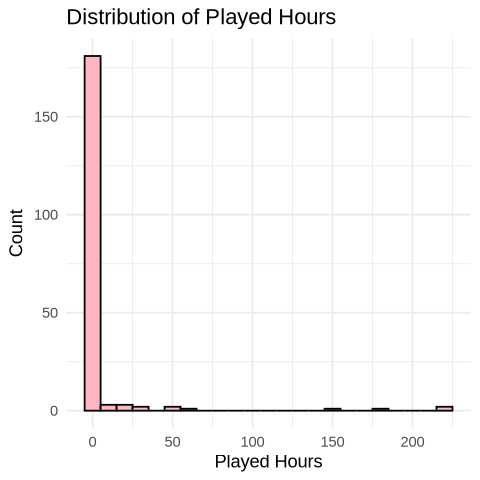

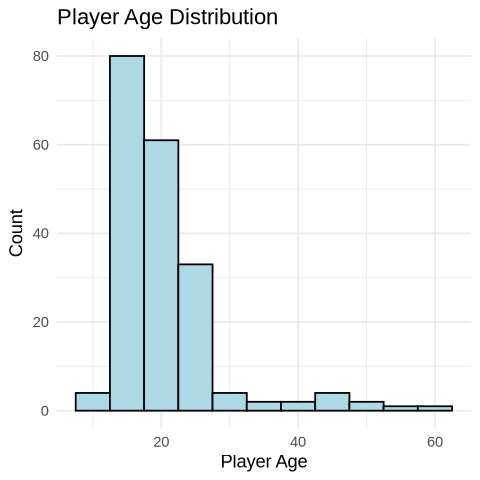

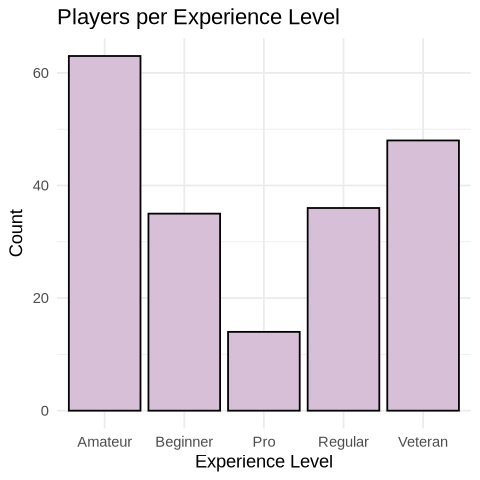

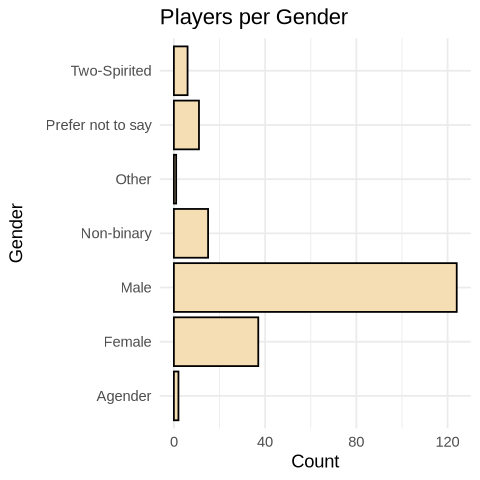

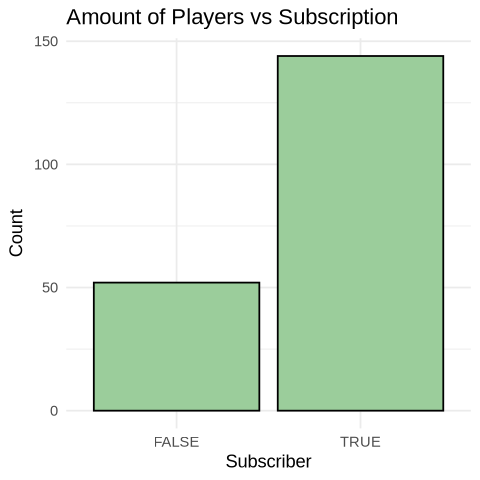

In [26]:
options(repr.plot.width = 4, repr.plot.height = 4)

hours_plot <- players |>
    ggplot(aes(x=played_hours)) +
    geom_histogram(binwidth = 10, fill='lightpink', color = 'black') +
    labs(y = "Count", x = "Played Hours", title = "Distribution of Played Hours") +
    theme_minimal(base_family = "sans")
hours_plot

age_plot <- players |>
    drop_na(age) |>
    ggplot(aes(x=age)) +
    geom_histogram(binwidth = 5, fill='lightblue', color = 'black') +
    labs(y = "Count", x = "Player Age", title = "Player Age Distribution") +
    theme_minimal(base_family = "sans")
age_plot

experience_plot <- players |>
    ggplot(aes(x=experience)) +
    geom_bar(stat='count', fill = 'thistle', color = 'black') +
    labs(x = 'Experience Level', y= 'Count', title = 'Players per Experience Level') +
    theme_minimal(base_family = "sans")
experience_plot

gender_plot <- players |>
    ggplot(aes(y=gender)) +
    geom_bar(stat='count', fill = 'wheat', color = 'black') +
    labs(x = 'Count', y= 'Gender', title = 'Players per Gender') +
    theme_minimal(base_family = "sans")
gender_plot

subscribe_plot <- players |>
    ggplot(aes(x=subscribe)) +
    geom_bar(stat='count', fill = 'darkseagreen3', color = 'black') +
    labs(x = 'Subscriber', y= 'Count', title = 'Amount of Players vs Subscription') +
    theme_minimal(base_family = "sans")
subscribe_plot

These plots show the general spread of data. One thing that stands out is that many players only play 0 hours and that most players are male.

#### Relationship Between Played Hours and Other Variables

In [ ]:
options(repr.plot.width = 6, repr.plot.height = 4)
hours_vs_exp <- players |>
    group_by(experience) |>
    summarize(mean_hours = mean(played_hours)) |>
    ggplot(aes(x = experience, y = mean_hours)) +
    geom_bar(stat = "identity", fill = 'thistle', color = 'black') +
    labs(y = 'Mean Played Hours', x = 'Experience', title = "Mean Played Hours per Experience Level") +
    theme_bw()
hours_vs_exp

options(repr.plot.width = 4, repr.plot.height = 4)

hours_vs_sub <- players |>
    group_by(subscribe) |>
    summarize(mean_hours = mean(played_hours)) |>
    ggplot(aes(x = subscribe, y = mean_hours)) +
    geom_bar(stat = "identity", fill = 'darkseagreen3', color = 'black') +
    labs(y = 'Mean Played Hours', x = 'Subscriber Status', title = "Mean Played Hours per Subscriber Status") +
    theme_bw()
hours_vs_sub

hours_vs_gen <- players |>
    group_by(gender) |>
    summarize(mean_hours = mean(played_hours)) |>
    ggplot(aes(y = gender, x = mean_hours)) +
    geom_bar(stat = "identity", fill = 'wheat', color = 'black') +
    labs(x = 'Mean Played Hours', y = 'Gender', title = "Mean Played Hours per Gender") +
    theme_bw()
hours_vs_gen

options(repr.plot.width = 8, repr.plot.height = 4)
hours_vs_age1 <- players |>
    drop_na(age) |>
    group_by(age) |>
    summarize(mean_hours = mean(played_hours)) |>
    ggplot(aes(x = age, y = mean_hours)) +
    geom_bar(stat="identity", fill='lightblue', color='black') +
    scale_x_continuous(breaks = seq(0, 60, by = 5)) +
    labs(y = 'Mean Played Hours', x = 'Age', title = "Mean Played Hours per Age") + 
    theme_bw()
hours_vs_age1

hours_vs_age2 <- players |>
    drop_na(age) |>
    ggplot(aes(x = age, y = played_hours)) +
    geom_point(alpha = 0.5, color = 'blue') +
    labs(y = 'Played Hours', x = 'Age', title = "Played Hours vs Age") +
    theme_bw()
hours_vs_age2

From this, we can see that regular level players, subscribers, non-binary people, and 16-year-olds play the most overall out of their respective categories.

## 4. Methods and Plan

I have chosen to use k-nearest neighbors-based regression to address my question.

1. **Why is this method appropriate?** <br>
Regression is appropriate because I am predicting played hours, which is a continuous numerical value. kNN will be used because it is uncertain that the data will follow linear regression and kNN doesn't make any assumptions about the distribution of data.

2. **Which assumptions are required, if any, to apply the method selected?** <br>
kNN assumes that the parameters are all on similar scales, so all the predictors have to be standardized by z-scoring. Otherwise, variables with larger variances would dominate. 

3. **What are the potential limitations or weaknesses of the method selected?** <br>
kNN has a high computational cost and is slower than linear regression when the training data is larger. It is also not as strong with many predictors and higher dimensions.<br><br>
Since multiple predictors are non-numerical, these have to be converted to numerical data to be applicable for kNN. I can change `subscribe` to 0 and 1 as T/F. I could rank `experience` on a 1 to 5 scale. The biggest issue lies with `gender`, for which I could give specific numbers as well, but gender has no clear values. Instead of doing that, I could also split genders into multiple variables and use 0/1 for their presence. But this is still not optimal because it makes it harder to fully compare the genders with one another.  <br><br>
It is also uncertain that having more variables (all four of these) will make the model better. It may be stronger with fewer.

4. **How are you going to process the data to apply the model?** <br>
I will first change the categorical variables to become numerical as specified before. Then, I can split the data into training/testing at 75/25, which is common practice. The training set will be used to find a good model fit, and the number of nearest neighbors can be found through cross-validation with 10 folds in which different k's are tested. The k with the lowest RMSE will be chosen. Once the model is trained and k has been found, it can be used to fit the testing data. 
